In [ ]:
from pysat.examples.hitman import Hitman
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:

file_path='./medicale_conflictgraph.dat'
with open(file_path, 'r') as file:
    int_arrays = []

    for line in file:

        int_list = [int(num) for num in line.strip().split()]

        int_arrays.append(int_list)

In [ ]:
result_set = set()

for row in int_arrays:
    inner_set = set()
    for element in row:
        inner_set.add(element)
    result_set.add(frozenset(inner_set))


print(result_set)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(len(result_set))

35710


In [ ]:
length_counts = {}
for s in result_set:
    length = len(s)
    if length in length_counts:
        length_counts[length] += 1
    else:
        length_counts[length] = 1

sorted_lengths = sorted(length_counts.keys(), reverse=True)

result_array = []

for length in sorted_lengths:
    count = length_counts[length]
    result_array.append((length, count))

print(result_array)

[(51, 148), (50, 74), (49, 138), (48, 126), (47, 102), (46, 125), (45, 325), (44, 84), (43, 190), (42, 138), (41, 233), (40, 185), (39, 224), (38, 195), (37, 193), (36, 318), (35, 418), (34, 319), (33, 235), (32, 3041), (31, 486), (30, 470), (29, 415), (28, 477), (27, 318), (26, 472), (25, 493), (24, 660), (23, 743), (22, 1028), (21, 1564), (20, 703), (19, 913), (18, 741), (17, 1101), (16, 935), (15, 1108), (14, 1226), (13, 1753), (12, 2245), (11, 1914), (2, 9134)]


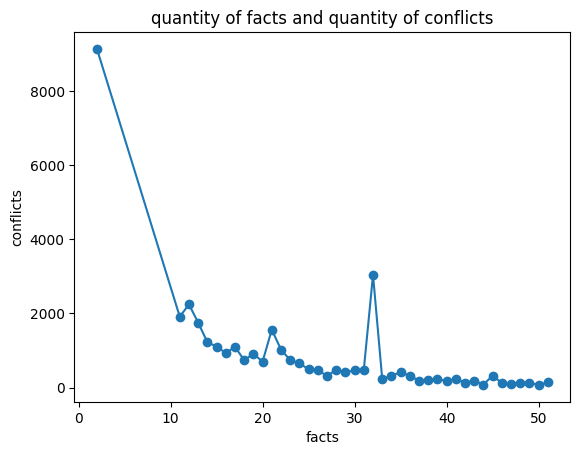

In [ ]:
import matplotlib.pyplot as plt
data = result_array
x_values, y_values = zip(*data)

plt.plot(x_values, y_values, marker='o', linestyle='-')

plt.title("quantity of facts and quantity of conflicts")
plt.xlabel("facts")
plt.ylabel("conflicts")

plt.show()

In [ ]:
int_arrays3 = []
for conflicts in result_set:
  conflict = list(conflicts)
  int_arrays3.append(conflict)

In [ ]:
#若为多元conflict则进行转换且储存index
edges=[]
for conflicts in result_set:
  conflict = list(conflicts)
  if len(conflict)>2 :
    for i in range(0,len(conflict)-1):
      edge = [conflict[i],conflict[i+1]]
      edges.append(edge)
  else:
    edges.append(conflict)

In [ ]:
G = nx.Graph()

G.add_edges_from(edges)

connected_components = list(nx.connected_components(G))

connected_components_list = [list(component) for component in connected_components]

for i, component in enumerate(connected_components_list, start=1):
    print(f" {i}: {component}")


 1: [397440, 418050, 244610, 324740, 279050, 113930, 257930, 311180, 149390, 431500, 289040, 301970, 206230, 13340, 11680, 440480, 96290, 251810, 207270, 158630, 81320, 223020, 327340, 21680, 387890, 453170, 38710, 274360, 169400, 163770, 431290, 369980, 16830, 105920, 443460, 367940, 401350, 428870, 273480, 214220, 297550, 89040, 22480, 176850, 39250, 238420, 6870, 41430, 46040, 167130, 220380, 419420, 315870, 259680, 109670, 253940, 267510, 96760, 309500, 326910]
 2: [242560, 369280, 431490, 32130, 335880, 349960, 207240, 440460, 391310, 72080, 32020, 141720, 297880, 183320, 434850, 63650, 145450, 288810, 7600, 429630, 203200, 121410, 26310, 192200, 260560, 285910, 20830, 415200, 22240, 53600, 179560, 443880, 303860, 3700, 39540, 106870, 454520, 420340, 354170, 191100]
 3: [140160, 51200, 307840, 209030, 124680, 282120, 436750, 333840, 99090, 171410, 323990, 415000, 41370, 93210, 194460, 97950, 126110, 29600, 382370, 420130, 378020, 342310, 390950, 265640, 274860, 290990, 301230, 888

In [ ]:
sorted_array = sorted(connected_components_list, key=lambda x: len(x), reverse=True)

top_10_arrays = sorted_array[:10]



 1 : 2469
 2 : 706
 3 : 322
 4 : 316
 5 : 159
 6 : 149
 7 : 147
 8 : 146
 9 : 143
 10 : 136


In [ ]:
len(sorted_array[0])

2469

In [ ]:
len(sorted_array[-1])

2

In [ ]:
nonbinary_subgraph_dict = {}
binary_subgraph_dict = {}
for i, component in enumerate(connected_components, start=1):
  if len(component) ==2 : binary_subgraph_dict[i] = list(component)
  else : nonbinary_subgraph_dict[i] = list(component)

sorted_subgraph_dict = dict(sorted(nonbinary_subgraph_dict.items(), key=lambda item: len(item[1]), reverse=True))

subgraph_edges_dict = {}

for i, component in enumerate(connected_components, start=1):
    subgraph = G.subgraph(component)



In [ ]:
def has_common_element(arr1, arr2):
    set1 = set(arr1)
    set2 = set(arr2)
    return bool(set1.intersection(set2))


In [ ]:
for index, component in sorted_subgraph_dict.items():
  edges =[]
  for array in int_arrays3:
    if has_common_element(component,array):
      edges.append(array)

  subgraph_edges_dict[index] = edges

In [ ]:
sorted_set = sorted(subgraph_edges_dict[1], key=lambda x: len(x), reverse=True)


[[418050, 324740, 113930, 279050, 149390, 289040, 13340, 11680, 440480, 96290, 207270, 158630, 327340, 387890, 38710, 274360, 369980, 16830, 105920, 367940, 443460, 401350, 428870, 214220, 22480, 89040, 176850, 39250, 6870, 46040, 419420, 220380, 315870, 259680, 253940, 267510, 96760, 326910], [418050, 324740, 279050, 149390, 289040, 13340, 11680, 440480, 96290, 207270, 158630, 327340, 387890, 38710, 274360, 369980, 16830, 105920, 367940, 443460, 401350, 428870, 273480, 214220, 22480, 89040, 176850, 39250, 6870, 46040, 419420, 220380, 315870, 259680, 253940, 267510, 96760, 326910], [418050, 324740, 279050, 149390, 289040, 13340, 11680, 440480, 96290, 207270, 158630, 81320, 327340, 387890, 38710, 274360, 369980, 16830, 105920, 367940, 443460, 401350, 428870, 214220, 22480, 89040, 176850, 39250, 6870, 46040, 419420, 220380, 315870, 259680, 253940, 267510, 96760, 326910], [418050, 324740, 279050, 149390, 289040, 13340, 11680, 440480, 96290, 207270, 158630, 327340, 387890, 38710, 274360, 3

In [ ]:
#calculate hittingset for each connected component，

mhs ={}

for index,nodes in sorted_subgraph_dict.items():
  mhs_array =[]
  with Hitman(bootstrap_with=subgraph_edges_dict[index], htype='sorted') as hitman:
      for hs in hitman.enumerate():
          mhs_array.append(hs)
  mhs[index] =mhs_array

In [ ]:
import json
file_name = "./conflictsprocessed.json"

with open(file_name, 'w') as json_file:
    json.dump(subgraph_edges_dict, json_file)


In [ ]:
file_name = "./hittingsetprocessed.json"

with open(file_name, 'w') as json_file:
    json.dump(mhs, json_file)